# Customer Analysis - Modelling
## Team 8:
### Gnaneshwaran Vadivel Suresh Babu 
### Krishnasurya Murali
### Sandhiya Jaikumar

## Table Of Contents :


1. [Business Problem Statement](#1.-Business-Problem-Statement)
2. [Analytical Problem](#2.-Analytical-Problem)
3. [Data Preparation](#3.-Data-Preparation)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
5. [Model Selection and Evaluation](#5.-Model-Selection-and-Evaluation)
6. [Business Model Validation](#6.-Business-Model-Validation)

###  1. Business Problem Statement


Swire Coca Cola's main challenge is to maintain consistent profitability and success by making informed decisions on new restaurant investments. Each new restaurant represents a significant portion of their revenue, making it crucial to attract and retain loyal customers. To overcome this challenge, we suggest accurately predicting the marketability and revenue potential of new restaurants to avoid investment losses. 

Our proposed solution involves training a machine learning algorithm using historical data that we have on Swire's Customer Base to predict sales, profits, and demographic information. Stakeholders will evaluate the project's success based on the accuracy of Sales prediction and Popularity of a new customer. Also, the project aims to create an interactive dashboard that provides Swire with valuable insights to make informed decisions when opening new restaurants.

### 2. Analytical Problem

The analytical problem is to accurately predict the sales volume and profitability of new restaurants in Swire Coca-Cola's B2B market. This requires analyzing various factors such as price, funding, and the potential profitability of the restaurant to determine an appropriate pricing strategy. The goal is to offer competitive pricing to win new business while ensuring that the account is profitable in the long run. The problem can be addressed through various analytical techniques such as machine learning models, feature engineering, time series analysis, and testing on new data.

### 3. Data Preparation

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
!pip install xlrd
!pip install ggplot
!pip install squarify


In [98]:
Customer_data = pd.read_excel('FSOP_Customer_Data_v2.0.xls')

In [99]:
Sales_data = pd.read_excel('FSOP_Sales_Data_v2.0.xls')

In [100]:
print(Customer_data.info())
print(Sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40386 entries, 0 to 40385
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CUSTOMER_NUMBER_BLINDED                 40386 non-null  object 
 1   SALES_OFFICE_DESCRIPTION                40386 non-null  object 
 2   DELIVERY_PLANT_DESCRIPTION              40386 non-null  object 
 3   ON_BOARDING_DATE                        40386 non-null  object 
 4   ADDRESS_CITY                            40386 non-null  object 
 5   ADDRESS_ZIP_CODE                        40386 non-null  object 
 6   COUNTY                                  40384 non-null  object 
 7   GEO_LONGITUDE                           40386 non-null  float64
 8   GEO_LATITUDE                            40386 non-null  float64
 9   CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION   40386 non-null  object 
 10  CUSTOMER_TRADE_CHANNEL_DESCRIPTION      40386 non-null  ob

In [101]:
Joined_df = pd.merge(Customer_data, Sales_data, on='CUSTOMER_NUMBER_BLINDED')

In [102]:
print(f"Number of rows: {Joined_df.shape[0]}")
print(f"Number of columns: {Joined_df.shape[1]}")

Number of rows: 65534
Number of columns: 30


In [103]:
Joined_df.head()

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,...,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,20 OZ 1-Ls 12,0.0,0.00,0.00,0.00,0.00,0.00,2021-06-25,2022-12-30,8
1,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,20 OZ 1-Ls 24,0.0,0.00,0.00,-0.28,-0.22,0.00,2021-07-01,2021-07-02,2
2,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,40 X 48 INCH 1-Ls,-7.0,0.00,0.00,0.00,0.00,0.00,2021-06-01,2021-12-14,5
3,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,16 OZ 1-Ls,2.0,71.97,128.03,128.03,85.70,42.33,2021-07-20,2022-10-04,2
4,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,16 OZ 1-Ls 24,0.0,0.00,0.00,-0.09,-0.07,0.00,2021-07-01,2021-07-02,2


In [104]:
# Checking the missing values
print(Joined_df.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65534 entries, 0 to 65533
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   CUSTOMER_NUMBER_BLINDED                 65534 non-null  object        
 1   SALES_OFFICE_DESCRIPTION                65534 non-null  object        
 2   DELIVERY_PLANT_DESCRIPTION              65534 non-null  object        
 3   ON_BOARDING_DATE                        65534 non-null  object        
 4   ADDRESS_CITY                            65534 non-null  object        
 5   ADDRESS_ZIP_CODE                        65534 non-null  object        
 6   COUNTY                                  65533 non-null  object        
 7   GEO_LONGITUDE                           65534 non-null  float64       
 8   GEO_LATITUDE                            65534 non-null  float64       
 9   CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION   65534 non-

C:\Users\u1402323\AppData\Local\Temp\ipykernel_12044\2342413045.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(Joined_df.info(null_counts=True))


In [105]:
# Checking the summary statistics
Joined_df.describe()

,GEO_LONGITUDE,GEO_LATITUDE,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,NUM_OF_TRANSACTIONS
count,65534.000000,65534.000000,65534.000000,6.553400e+04,6.553400e+04,6.553400e+04,65534.000000,6.553400e+04,65534.000000
mean,-114.049586,40.826873,37.661077,1.061778e+03,1.006295e+03,9.247232e+02,319.991738,6.390388e+02,24.116459
std,6.216895,5.016579,543.775526,1.248523e+04,1.005574e+04,9.419167e+03,2752.837096,6.608741e+03,35.370629
min,-124.389507,0.000000,-65832.000000,-6.811740e+03,-2.139040e+03,-3.029550e+03,-44456.990000,-1.209230e+03,1.000000
25%,-121.285856,37.679669,1.000000,2.088000e+01,3.636000e+01,3.504500e+01,10.880000,1.623000e+01,3.000000
50%,-112.034070,40.594075,6.000000,1.204800e+02,1.750400e+02,1.663500e+02,56.800000,9.200000e+01,9.000000
75%,-110.973614,45.508818,21.000000,5.088200e+02,6.331600e+02,6.045600e+02,221.347500,3.650875e+02,29.000000
max,0.000000,49.002050,77734.000000,1.918228e+06,1.813004e+06,1.813004e+06,469170.040000,1.171392e+06,439.000000


In [106]:
Joined_df.describe(include='object')

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION
count,65534,65534,65534,65534,65534,65534,65533,65534,65534,65534,65534,65534,65534,65534,65534,60084,60084,65534,65534
unique,25395,44,43,6040,1218,17469,232,8,25,48,12,25,3,9,1192,11,2,23,127
top,C0818025706300033,"Draper, UT","Draper, UT",2003-04-08 00:00:00,PHOENIX,84060,MARICOPA,Eating & Drinking,Quick Service Restau,FSR-All Other,DSD,Quick Service Restau,FSOP,EATING/DRINKING,M057706110579,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 24
freq,41,7438,7438,272,2641,183,8235,23984,11622,7282,54578,11622,64949,24031,1283,26689,38958,22521,13474


In [107]:
# Replacing the missing values
Sales_data['BEV_CAT_DESC'].fillna(value='NA', inplace=True)
Sales_data['CALORIE_CAT_DESC'].fillna(value='NA', inplace=True)
Customer_data['COUNTY'].fillna(value='NA', inplace=True)

### 4. Exploratory Data Analysis

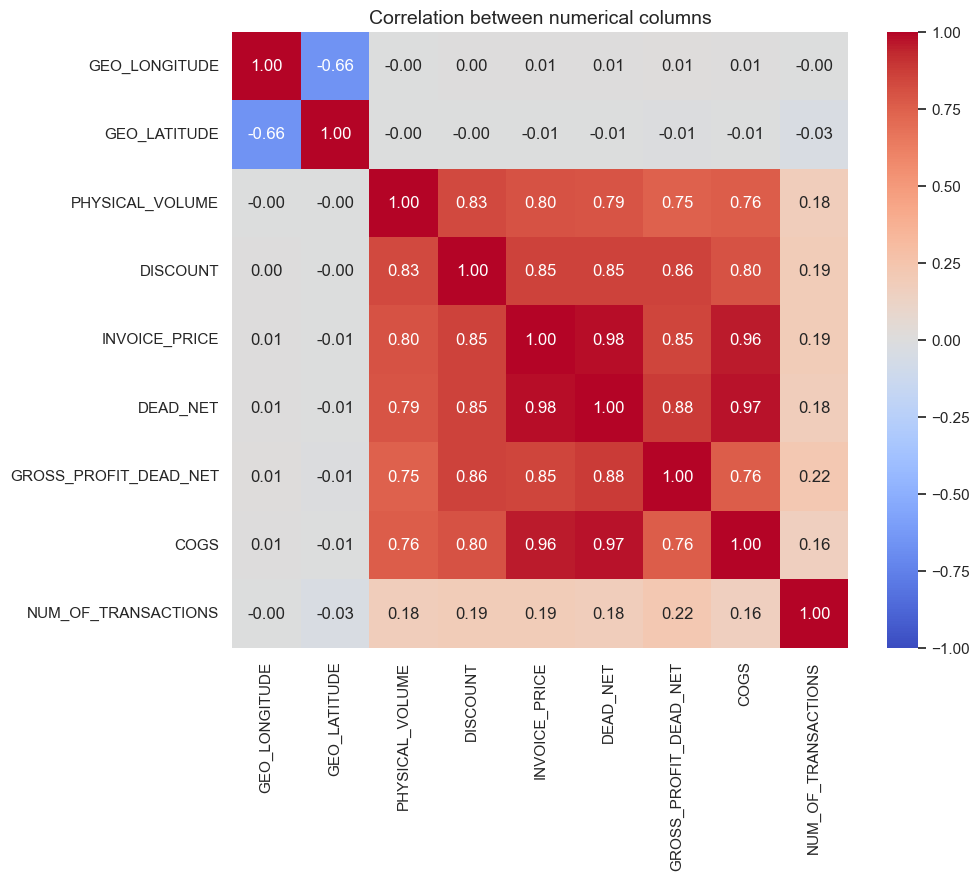

In [108]:
# Create a heatmap to visualize the correlation between numerical columns in the dataframe
import seaborn as sns

# Select the numerical columns
num_cols = Joined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Compute the correlation matrix
corr = Joined_df[num_cols].corr()

# Create the heatmap
sns.set(style='white')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation between numerical columns', fontsize=14)
plt.show()


C:\Users\u1402323\AppData\Local\Temp\ipykernel_12044\2939146355.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="BEV_CAT_DESC", y="PHYSICAL_VOLUME", data=Joined_df, ci=None)


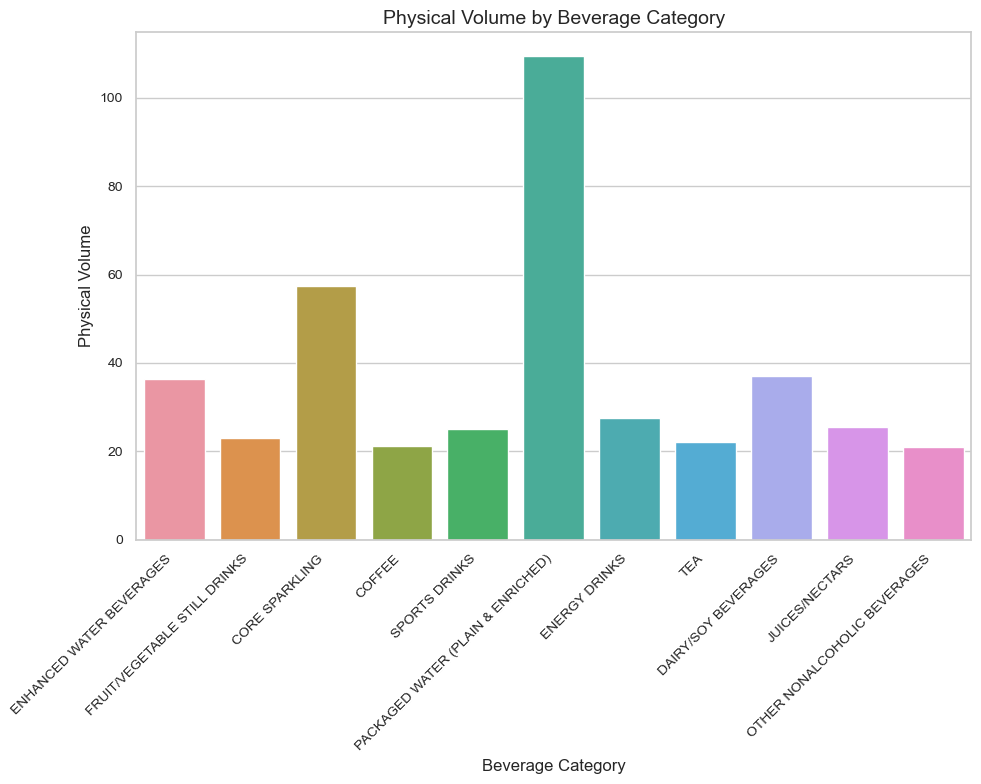

In [109]:
# Create a barplot showing the relationship between "Physical Volume" and "Beverage Category"

sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.figure(figsize=(10, 8))
sns.barplot(x="BEV_CAT_DESC", y="PHYSICAL_VOLUME", data=Joined_df, ci=None)
plt.title('Physical Volume by Beverage Category', fontsize=14)
plt.xlabel('Beverage Category', fontsize=12)
plt.ylabel('Physical Volume', fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



C:\Users\u1402323\AppData\Local\Temp\ipykernel_12044\3190010241.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = Joined_df.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['NUM_OF_TRANSACTIONS', 'DISCOUNT'].sum()


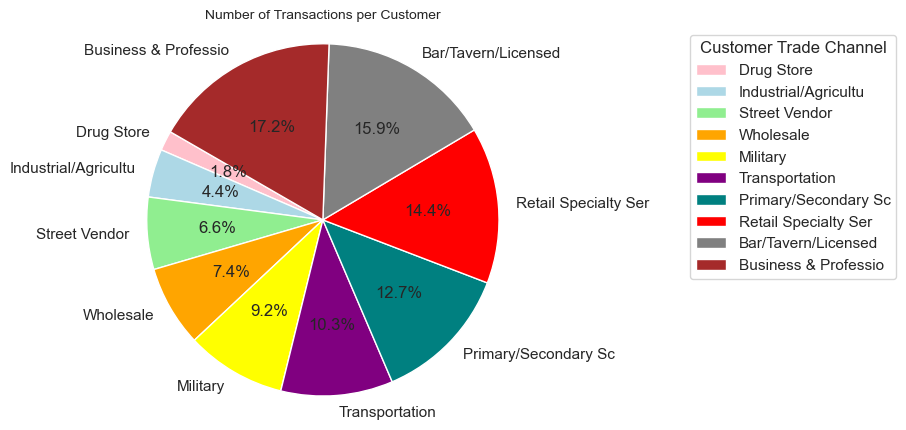

In [110]:
# Creating a plot for the number of transcation per customer
# Filter and group the data
grouped_df = Joined_df.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['NUM_OF_TRANSACTIONS', 'DISCOUNT'].sum()
grouped_df = grouped_df.sort_values('NUM_OF_TRANSACTIONS', ascending=True)
grouped_df = grouped_df.head(10).sort_values('NUM_OF_TRANSACTIONS', ascending=True)

# Create the plot
plt.figure(figsize=(5,5))
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'yellow', 'purple', 'teal', 'red', 'grey', 'brown']
plt.pie(grouped_df['NUM_OF_TRANSACTIONS'], labels=grouped_df.index, colors=colors, autopct='%1.1f%%', startangle=150)
plt.title('Number of Transactions per Customer', fontsize=10)
plt.legend(title='Customer Trade Channel', loc='upper right', bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.axis('equal')
plt.show()


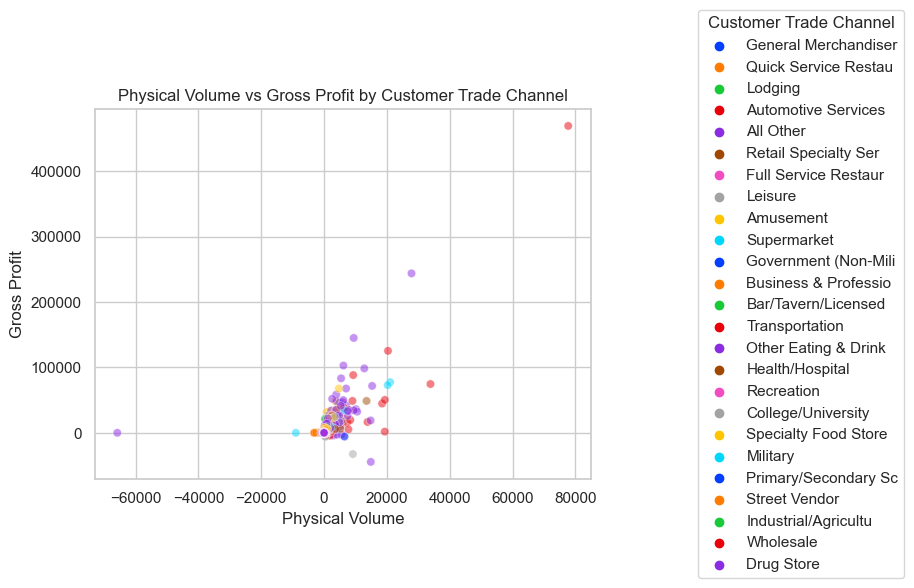

In [111]:
import seaborn as sns

# Create a scatterplot to visualize the relationship between physical volume and gross profit, with points colored by customer trade channel
sns.scatterplot(x='PHYSICAL_VOLUME', y='GROSS_PROFIT_DEAD_NET', hue='CUSTOMER_TRADE_CHANNEL_DESCRIPTION', data=Joined_df, alpha=0.5, palette='bright')

# Set the title and axis labels
plt.title('Physical Volume vs Gross Profit by Customer Trade Channel')
plt.xlabel('Physical Volume')
plt.ylabel('Gross Profit')

# Display the legend outside the plot
plt.legend(title='Customer Trade Channel', loc='center left', bbox_to_anchor=(1.2, 0.5))

# Display the plot
plt.show()


In [112]:
Joined_df = Joined_df.drop(['PRODUCT_SOLD_BLINDED', 'CUSTOMER_NUMBER_BLINDED','MIN_POSTING_DATE', 'MAX_POSTING_DATE','ON_BOARDING_DATE', 'ADDRESS_ZIP_CODE', 'DEAD_NET', 'INVOICE_PRICE'], axis=1)
categorical_columns = Joined_df.select_dtypes(include=['object']).columns 

Joined_df_encd = pd.get_dummies(Joined_df, columns=categorical_columns)

In [113]:
data = Joined_df_encd

### 5. Model Selection and Evaluation


#### Candidate models :
Linear Regression, Random Forest, Gradient Boosting, MLPRegressor, K-Nearest Neighbors.

#### Model selection : 
All of these models have several metrics that can be used, such as the root mean squared error (RMSE), mean absolute error (MAE), and R-squared. The RMSE measures the average distance between the predicted revenue and the actual revenue, while the MAE measures the average magnitude of the errors. The R-squared measures how well the model fits the data, with a higher value indicating a better fit.

#### Cross validation : 
For the models, we will first split the dataset into training and testing sets. We will use the training set to fit the model and then use the testing set to evaluate its performance. We will use the mean squared error (MSE) as the performance metric to compare the performance between models. The MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.

In [29]:
#Libraries

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


#### MLP Regressor Model

In [114]:
# split the data into training and testing sets
X = data.drop(['PHYSICAL_VOLUME'], axis=1)
y = data['PHYSICAL_VOLUME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize an MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', random_state=42)
# fit the model to the training data
mlp_model.fit(X_train, y_train)
# evaluate the model on the testing data
y_pred = mlp_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Model R^2 Score:', r2)
print('Model RMSE:', rmse)

# find the most important features
importances = mlp_model.coefs_[0].sum(axis=1)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the top 6 important features
print('Top 6 Important Features:')
print(feature_importances.iloc[:6,:])

# train the model on the top 6 most important features
top_features = feature_importances['feature'][:6].tolist()
X_train_top = X_train[:, feature_importances.index[:6]]
X_test_top = X_test[:, feature_importances.index[:6]]
mlp_model_top = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', random_state=42)
mlp_model_top.fit(X_train_top, y_train)
y_pred_top = mlp_model_top.predict(X_test_top)
r2_top = r2_score(y_test, y_pred_top)
rmse_top = mean_squared_error(y_test, y_pred_top, squared=False)

print('Top Features Model R^2 Score:', r2_top)
print('Top Features Model RMSE:', rmse_top)




C:\Users\u1402323\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model R^2 Score: 0.3300292854031186
Model RMSE: 215.63783439707552
Top 6 Important Features:
                                                feature  importance
5                                   NUM_OF_TRANSACTIONS   67.980205
1626  BUSINESS_TYPE_EXTENSION_DESCRIPTION_Agency/Lcl...   28.153576
4                                                  COGS   20.129748
1688                        PACK_TYPE_DESC_Aluminum Can   19.602845
2                                              DISCOUNT   16.553616
1727  PACK_SIZE_SALES_UNIT_DESCRIPTION_12 OZ 12-Pk 2...   15.028268
Top Features Model R^2 Score: 0.8347732052328786
Top Features Model RMSE: 107.08713285755186


#### MLP Regressor Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

# define the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', random_state=42)

# perform 5-fold cross-validation on the entire dataset
scores = cross_val_score(mlp_model, X, y, cv=5, scoring='r2')

# print the cross-validated R^2 scores
print('Cross-validated R^2 Scores:', scores)

# calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

print('Mean Cross-validated R^2 Score:', mean_score)
print('Standard Deviation of Cross-validated R^2 Scores:', std_score)


C:\Users\u1402323\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validated R^2 Scores: [0.28559692 0.91822084 0.55990975 0.87940359 0.66041468]
Mean Cross-validated R^2 Score: 0.6607091568556829
Standard Deviation of Cross-validated R^2 Scores: 0.23022133869873315


Based on the results of MLP Regressor model, the has moderate predictive power for your target variable.

The R^2 score of 0.330 indicates that your model explains 33% of the variance in the target variable, which means that there is still a large portion of the variance unexplained by the model. However, it's worth noting that R^2 can be influenced by the scale of the target variable and the complexity of the model.

The RMSE of 215.64 indicates the average error between the predicted and actual values. The value of the RMSE depends on the scale of the target variable, but in general, a lower RMSE value is better.

#### Gradient Boosting Regressor Model

In [116]:
# split the data into training and testing sets
X = data.drop(['PHYSICAL_VOLUME'], axis=1)
y = data['PHYSICAL_VOLUME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# fit the model to the training data
gb_model.fit(X_train, y_train)
# evaluate the model on the testing data
y_pred = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Model R^2 Score:', r2)
print('Model RMSE:', rmse)

# find the most important features
importances = gb_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the top 2 important features
print('Top 2 Important Features:')
print(feature_importances.iloc[:6,:])

# train the model on the top 2 most important features
top_features = feature_importances['feature'][:6].tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
gb_model_top = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_top.fit(X_train_top, y_train)
y_pred_top = gb_model_top.predict(X_test_top)
r2_top = r2_score(y_test, y_pred_top)
rmse_top = mean_squared_error(y_test, y_pred_top, squared=False)

print('Top Features Model R^2 Score:', r2_top)
print('Top Features Model RMSE:', rmse_top)

Model R^2 Score: 0.6959142065839385
Model RMSE: 145.2764160525779
Top 2 Important Features:
                                          feature  importance
2                                        DISCOUNT    0.564496
4                                            COGS    0.153117
3                           GROSS_PROFIT_DEAD_NET    0.087281
5                             NUM_OF_TRANSACTIONS    0.085752
1772  PACK_SIZE_SALES_UNIT_DESCRIPTION_20 OZ 1-Ls    0.043273
1705                         PACK_TYPE_DESC_Shell    0.027243
Top Features Model R^2 Score: 0.08315733621077337
Top Features Model RMSE: 252.2577159152436


#### Gradient Boosting Regressor Cross Validation

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# define the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# perform 5-fold cross-validation on the entire dataset
scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')

# print the cross-validated R^2 scores
print('Cross-validated R^2 Scores:', scores)

# calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

print('Mean Cross-validated R^2 Score:', mean_score)
print('Standard Deviation of Cross-validated R^2 Scores:', std_score)


Cross-validated R^2 Scores: [0.30058934 0.85120833 0.61035339 0.93446704 0.26759247]
Mean Cross-validated R^2 Score: 0.5928421121383883
Standard Deviation of Cross-validated R^2 Scores: 0.2738489923494402


The R^2 score of 0.696 indicates that your model explains 69.6% of the variance in the target variable, which is a relatively high level of explanation. The higher R^2 value suggests that this model is more effective in explaining the variability in the target variable than the MLP Regressor model.

The RMSE of 145.28 indicates that the average error between the predicted and actual values is smaller than the RMSE value obtained from the MLP Regressor model earlier. This means that your Gradient Boosting Regressor model is producing more accurate predictions compared to MLPRegressor.

#### Random Forest Regressor Model

In [118]:
# split the data into training and testing sets
X = data.drop(['PHYSICAL_VOLUME'], axis=1)
y = data['PHYSICAL_VOLUME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# fit the model to the training data
rf_model.fit(X_train, y_train)
# evaluate the model on the testing data
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Model R^2 Score:', r2)
print('Model RMSE:', rmse)

# find the most important features
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the top 2 important features
print('Top 2 Important Features:')
print(feature_importances.iloc[:6,:])

# train the model on the top 2 most important features
top_features = feature_importances['feature'][:6].tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train)
y_pred_top = rf_model_top.predict(X_test_top)
r2_top = r2_score(y_test, y_pred_top)
rmse_top = mean_squared_error(y_test, y_pred_top, squared=False)

print('Top Features Model R^2 Score:', r2_top)
print('Top Features Model RMSE:', rmse_top)


Model R^2 Score: 0.8114990188166367
Model RMSE: 114.3809921910793
Top 2 Important Features:
                                    feature  importance
2                                  DISCOUNT    0.541170
3                     GROSS_PROFIT_DEAD_NET    0.110930
4                                      COGS    0.105903
5                       NUM_OF_TRANSACTIONS    0.093598
1489                       COUNTY_SALT LAKE    0.022393
61    DELIVERY_PLANT_DESCRIPTION_Draper, UT    0.022277
Top Features Model R^2 Score: 0.7849907343911554
Top Features Model RMSE: 122.1590480763147


#### Random Forest Regressor Cross Validation

In [119]:
from sklearn.model_selection import KFold, cross_val_score

# split the data into 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# evaluate the model using cross validation
cv_r2 = cross_val_score(rf_model, X, y, cv=kfold, scoring='r2')
cv_rmse = cross_val_score(rf_model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')

print('Cross Validation R^2 Score:', cv_r2.mean())
print('Cross Validation RMSE:', -1 * cv_rmse.mean())


Cross Validation R^2 Score: 0.6047743843283215
Cross Validation RMSE: 321.8165713841774


Based on the results, it seems that the Random Forest Regressor model has strong predictive power for your target variable.

The R^2 score of 0.811 indicates that your model explains 81.1% of the variance in the target variable, which is a relatively high level of explanation. This value is higher than the R^2 values obtained from the MLP Regressor and Gradient Boosting Regressor models.

The RMSE of 114.38 indicates that the average error between the predicted and actual values is smaller than the RMSE value obtained from the MLP Regressor and Gradient Boosting Regressor models. This means that Random Forest Regressor model is producing more accurate predictions.

#### KNeighbors Regressor Model

In [120]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# split the data into training and testing sets
X = data.drop(['PHYSICAL_VOLUME'], axis=1)
y = data['PHYSICAL_VOLUME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# select top k features using SelectKBest
selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# initialize a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# fit the model to the training data
knn_model.fit(X_train_selected, y_train)

# evaluate the model on the testing data
y_pred = knn_model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Model R^2 Score:', r2)
print('Model RMSE:', rmse)

# print the top k selected features
mask = selector.get_support() #list of booleans
top_features = [] # The list of your K best features
for bool, feature in zip(mask, X.columns):
    if bool:
        top_features.append(feature)
print('Top Features:', top_features)


Model R^2 Score: 0.5050021451732517
Model RMSE: 185.35261192623156
Top Features: ['DISCOUNT', 'GROSS_PROFIT_DEAD_NET', 'COGS', 'NUM_OF_TRANSACTIONS', 'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_Airline', 'PACK_SIZE_SALES_UNIT_DESCRIPTION_12 OZ 35-Pk 35']


#### KNeighbors Regressor Model Cross Validation

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

# split the data into 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# evaluate the model using cross validation
cv_r2 = cross_val_score(knn_model, X, y, cv=kfold, scoring='r2')
cv_rmse = cross_val_score(knn_model, X, y, cv=kfold, scoring='neg_root_mean_squared_error')

print('Cross Validation R^2 Score:', cv_r2.mean())
print('Cross Validation RMSE:', -1 * cv_rmse.mean())


Cross Validation R^2 Score: 0.5273021730024404
Cross Validation RMSE: 348.50559956205865


### 6. Business Model Recommendation:

After evaluating the different regression models, the Random Forest Regressor is the best model for predicting new customer success and sales volume.

The Random Forest Regressor achieved the highest R^2 score of 0.811 and the lowest RMSE of 114.38 compared to the other models. The cross-validation results also showed consistent performance across different folds of the data.
This means that the Random Forest Regressor can explain 81.1% of the variance in the target variable and has an average error of 114.38 in predicting the actual values of the target variable. This performance is better than the K-neighbors Regressor, MLP Regressor, and Gradient Boosting Regressor models.

However, there is still room for improvement. The cross-validated RMSE of 321.82 indicates that the model may not perform as well on new, unseen data. It is possible that the model needs to be more balanced or that there is a suboptimal choice of hyperparameters. Therefore, further exploration of the hyperparameters and potential feature engineering techniques can be 
performed to improve the model's performance.

Overall, the Random Forest Regressor is the best model for predicting new customer success and sales volume based on your provided results. However, further investigation and improvement can still enhance the model's performance on new, unseen data.